In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
my_df = pd.read_csv('clean.csv')

In [35]:
my_df.head()

,Id,Listing_Url,Name,Picture_Url,Host_Name,Host_Since,Host_Response_Rate,Superhost,Neighbourhood,Latitude,...,Beds,Amenities,Review_Scores_Rating,Review_Scores_Cleanliness,Review_Scores_Checkin,Review_Scores_Communication,Review_Scores_Location,Review_Scores_Value,City,Price(USD)
0,7397.0,https://www.airbnb.com/rooms/7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,https://a0.muscache.com/pictures/67928287/330b...,Franck,8/30/08,100%,t,Hôtel-de-Ville,48.85909,...,2.0,"[""Free washer \u2013 In unit"", ""Oven"", ""Host g...",4.72,4.43,4.91,4.88,4.93,4.72,paris,129.71
1,81870.0,https://www.airbnb.com/rooms/81870,Saint Germain Musee d'orsay,https://a0.muscache.com/pictures/558458/3c1263...,Delphine,6/25/10,59%,f,Luxembourg,48.85558,...,1.0,"[""Oven"", ""Host greets you"", ""Coffee maker"", ""C...",5.00,5.00,5.00,5.00,5.00,4.00,paris,158.05
2,9952.0,https://www.airbnb.com/rooms/9952,Paris petit coin douillet,https://a0.muscache.com/pictures/ae822d16-74d2...,Elisabeth,8/24/09,100%,t,Popincourt,48.86373,...,1.0,"[""Oven"", ""Host greets you"", ""Coffee maker"", ""S...",4.91,4.86,4.98,4.84,4.88,4.91,paris,152.60
3,84820.0,https://www.airbnb.com/rooms/84820,Bird's nest in Montmartre: Sun/view all over P...,https://a0.muscache.com/pictures/581023/86105d...,Laure,3/26/11,100%,t,Buttes-Montmartre,48.88238,...,1.0,"[""Free washer \u2013 In unit"", ""Oven"", ""Host g...",4.87,4.86,4.85,4.88,4.90,4.77,paris,90.47
4,86053.0,https://www.airbnb.com/rooms/86053,Charmful flat facing a gothic church,https://a0.muscache.com/pictures/1982057/f94cf...,Richard,11/23/10,100%,t,Louvre,48.86033,...,2.0,"[""Baking sheet"", ""Children\u2019s books and to...",4.87,4.76,4.95,4.95,4.99,4.86,paris,292.12


In [41]:
my_df['Host_Since'] = pd.to_datetime(my_df['Host_Since'])

## Host Year Stuff

In [45]:
my_df['Host_Since_Year'] = my_df['Host_Since'].dt.year

In [53]:
#when did most hosts start working with airbnb
hosts_grouped = my_df.groupby('Host_Since_Year').count()['Id']
hosts_df=hosts_grouped.reset_index()

In [54]:
hosts_df

,Host_Since_Year,Id
0,2008,11
1,2009,116
2,2010,484
3,2011,1929
4,2012,4684
5,2013,6705
6,2014,9487
7,2015,11826
8,2016,9589
9,2017,6400


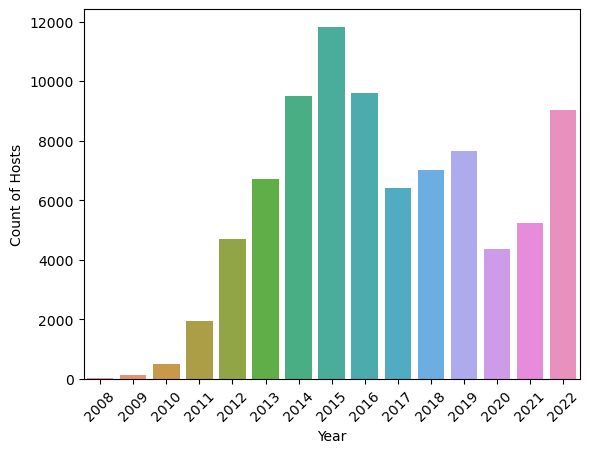

In [66]:
hosts_year_plot = sns.barplot(data=hosts_df,x='Host_Since_Year',y='Id')
hosts_year_plot.set_xticklabels(hosts_year_plot.get_xticklabels(),rotation=45)
hosts_year_plot.set_xlabel('Year')
hosts_year_plot.set_ylabel('Count of Hosts')
hosts_year_plot;
# 2015 had the most signups, 2022 also had a resurgence in general

In [71]:
#hosts per year by city
hosts_city_year = my_df.groupby(['City','Host_Since_Year']).count()['Id']
hosts_city_year_df = hosts_city_year.reset_index()
hosts_city_year_df

,City,Host_Since_Year,Id
0,bangkok,2009,2
1,bangkok,2010,41
2,bangkok,2011,72
3,bangkok,2012,218
4,bangkok,2013,443
...,...,...,...
80,singapore,2018,67
81,singapore,2019,55
82,singapore,2020,57
83,singapore,2021,13


<AxesSubplot:xlabel='Host_Since_Year', ylabel='Id'>

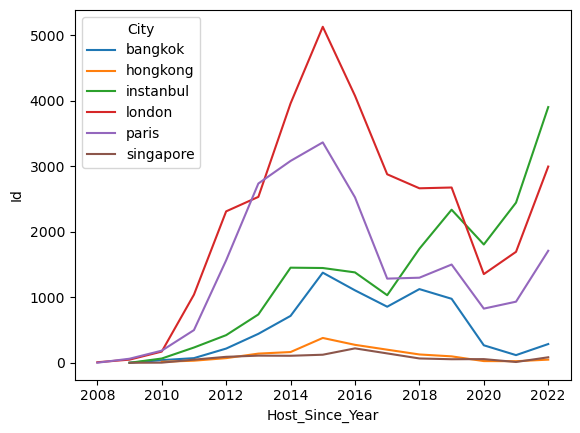

In [82]:
sns.lineplot(data=hosts_city_year_df,x='Host_Since_Year',y='Id',hue='City')

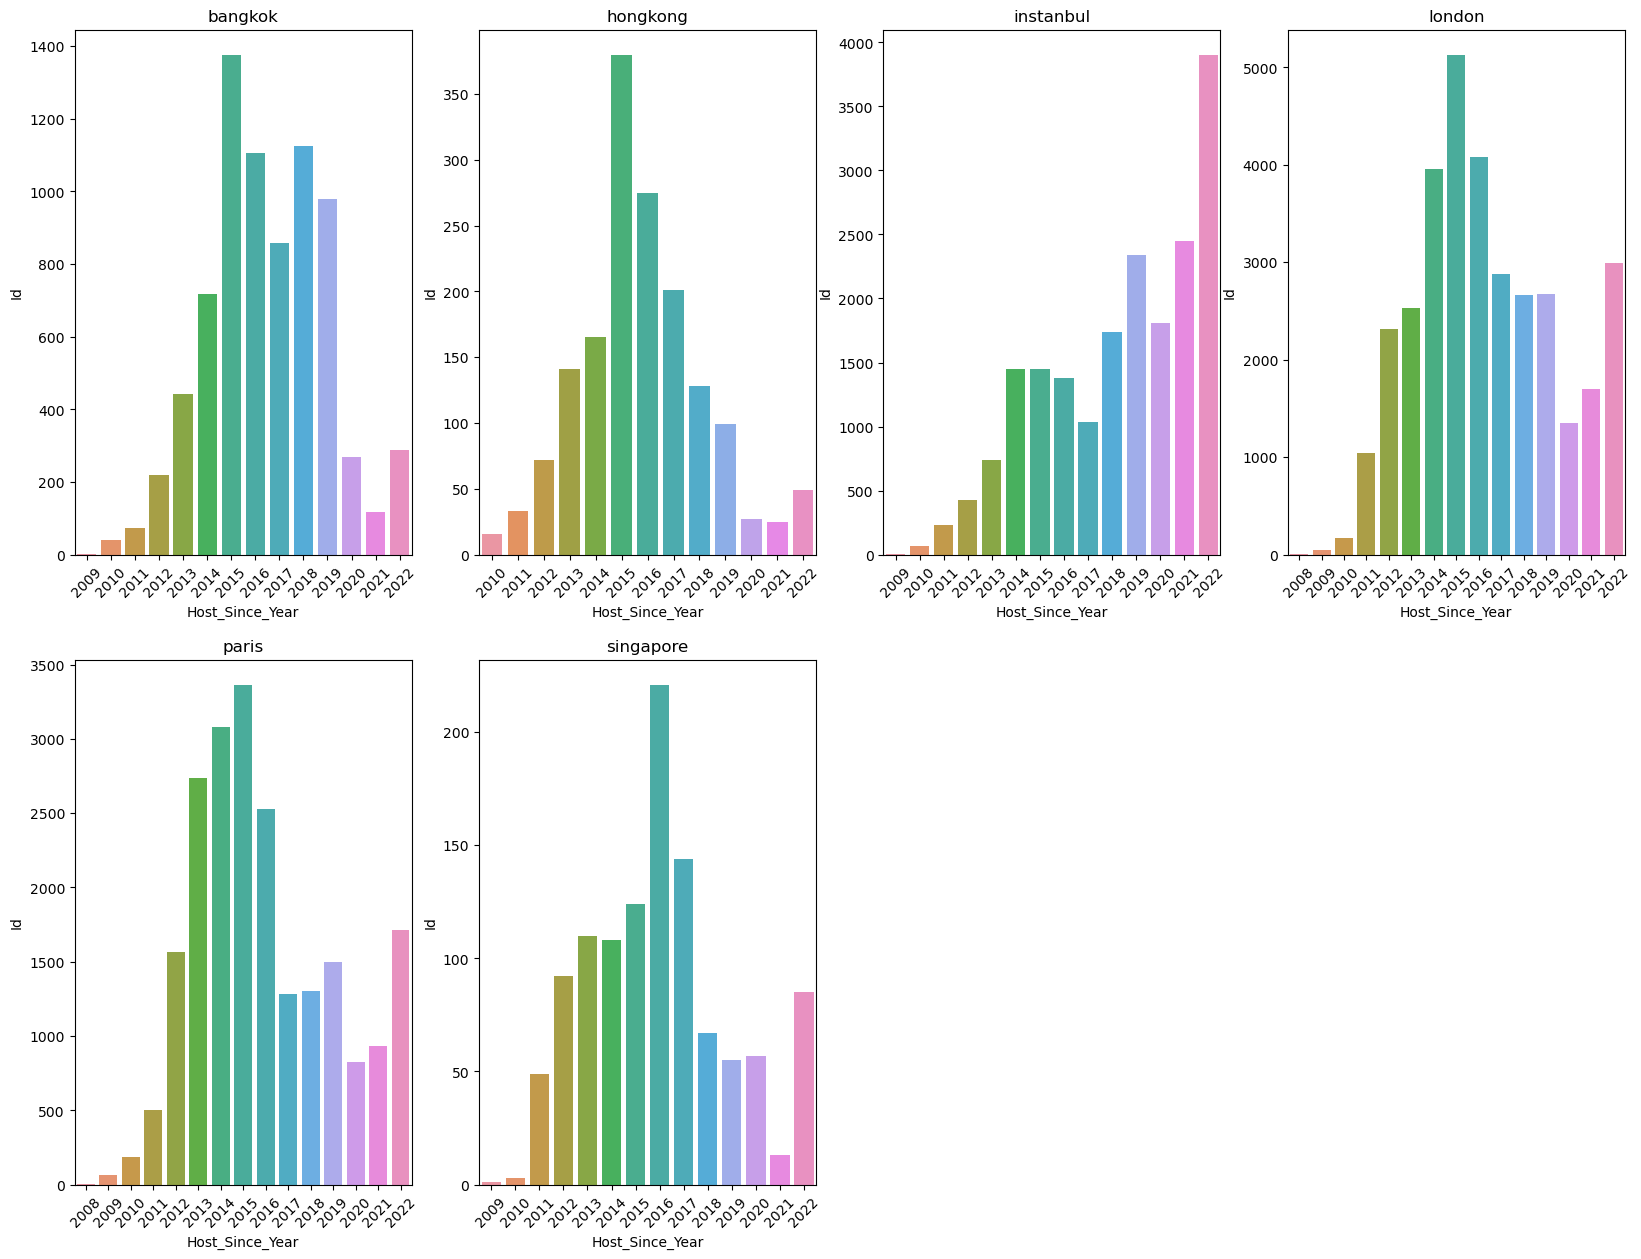

In [117]:
plt.figure(figsize=(20, 15))


for i,thing in enumerate(hosts_city_year_df['City'].unique()):
    ax = plt.subplot(2, 4, i + 1)
    sns.barplot(x=hosts_city_year_df[hosts_city_year_df['City'] == thing]['Host_Since_Year'],\
                y=hosts_city_year_df[hosts_city_year_df['City'] == thing]['Id'],\
                ax=ax).set(title=thing)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    

## Superhost Stuff

In [86]:
superhosts_df = my_df[my_df['Superhost'] == 't']

In [104]:
#percentage of superhosts by city
superhosts_city_year = my_df.groupby(['City','Superhost']).agg({'Id':'count'})
superhosts_city_year
superhosts_city_year['% of'] = superhosts_city_year.groupby(level=0).apply(lambda x: 100*x / x.sum())
superhosts_city_year
superhosts_city_year_df = superhosts_city_year.reset_index()
superhosts_city_year_df

,City,Superhost,Id,% of
0,bangkok,f,5302,69.662331
1,bangkok,t,2309,30.337669
2,hongkong,f,1299,80.633147
3,hongkong,t,312,19.366853
4,instanbul,f,14217,74.763357
5,instanbul,t,4799,25.236643
6,london,f,25579,76.227798
7,london,t,7977,23.772202
8,paris,f,15930,73.780742
9,paris,t,5661,26.219258


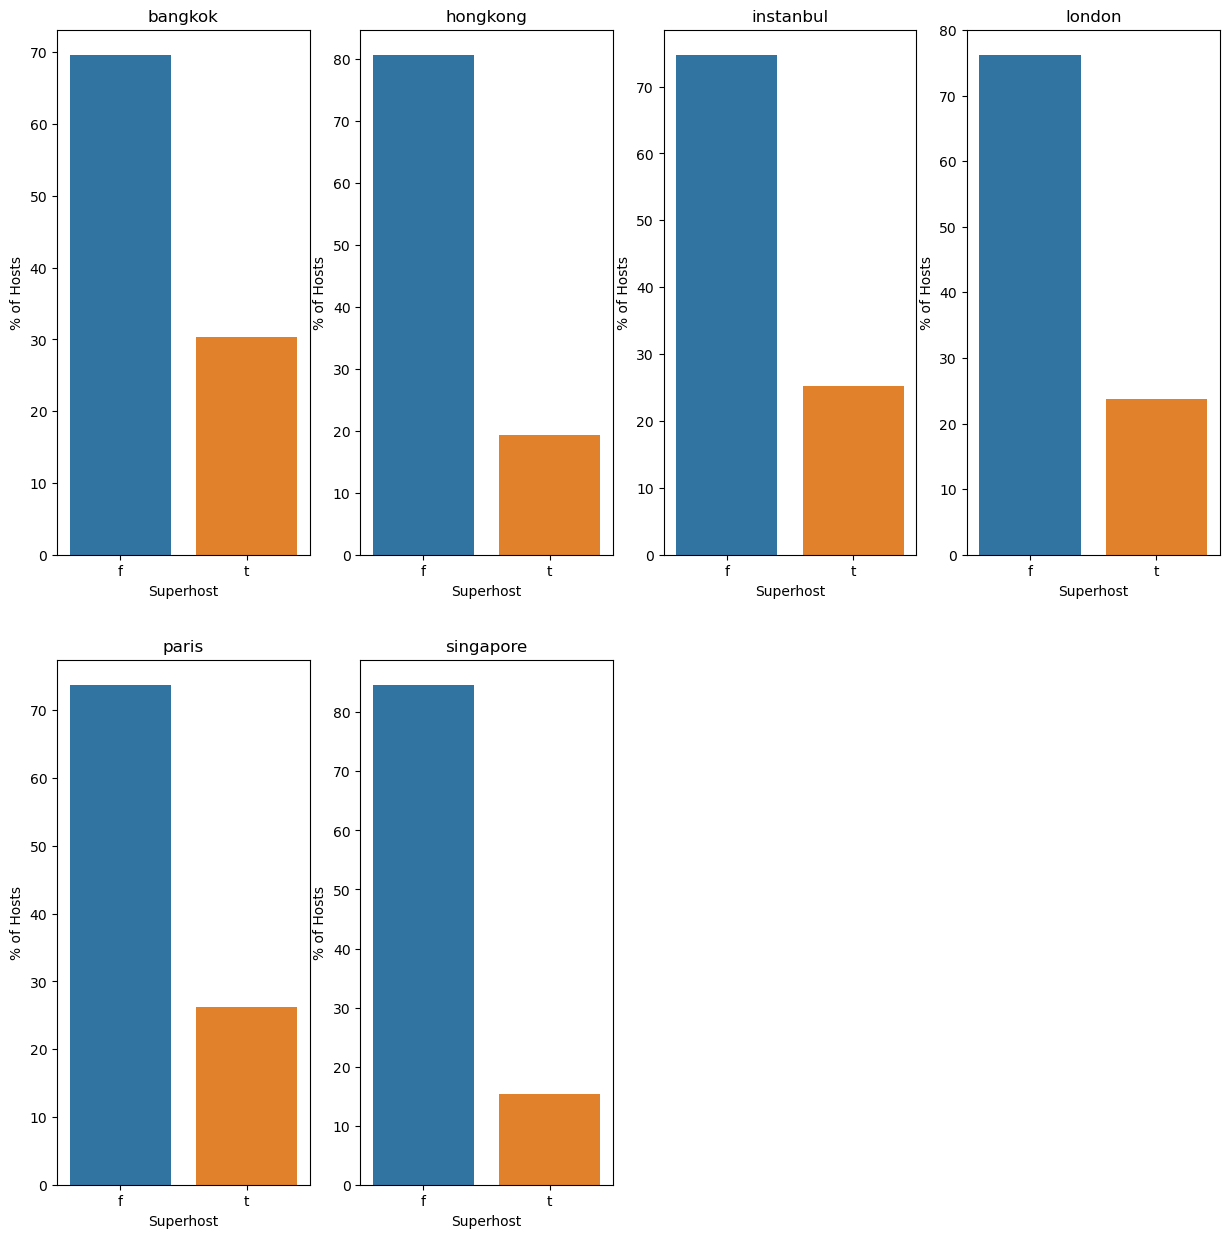

In [119]:
plt.figure(figsize=(15, 15))
for i,thing in enumerate(superhosts_city_year_df['City'].unique()):
    ax = plt.subplot(2, 4, i + 1)
    sns.barplot(x=superhosts_city_year_df[superhosts_city_year_df['City'] == thing]['Superhost'],\
                y=superhosts_city_year_df[superhosts_city_year_df['City'] == thing]['% of'],\
                ax=ax).set(title=thing,ylabel='% of Hosts')

In [122]:
#use mean
#price
superhosts_city_cost = my_df.groupby(['City','Superhost']).agg({'Price(USD)':'mean'})
superhosts_city_cost_df = superhosts_city_cost.reset_index()
superhosts_city_cost_df



,City,Superhost,Price(USD)
0,bangkok,f,104.306387
1,bangkok,t,68.868657
2,hongkong,f,503.872294
3,hongkong,t,146.396250
4,instanbul,f,116.451427
5,instanbul,t,139.881430
6,london,f,249.968575
7,london,t,204.737919
8,paris,f,217.096216
9,paris,t,238.874696


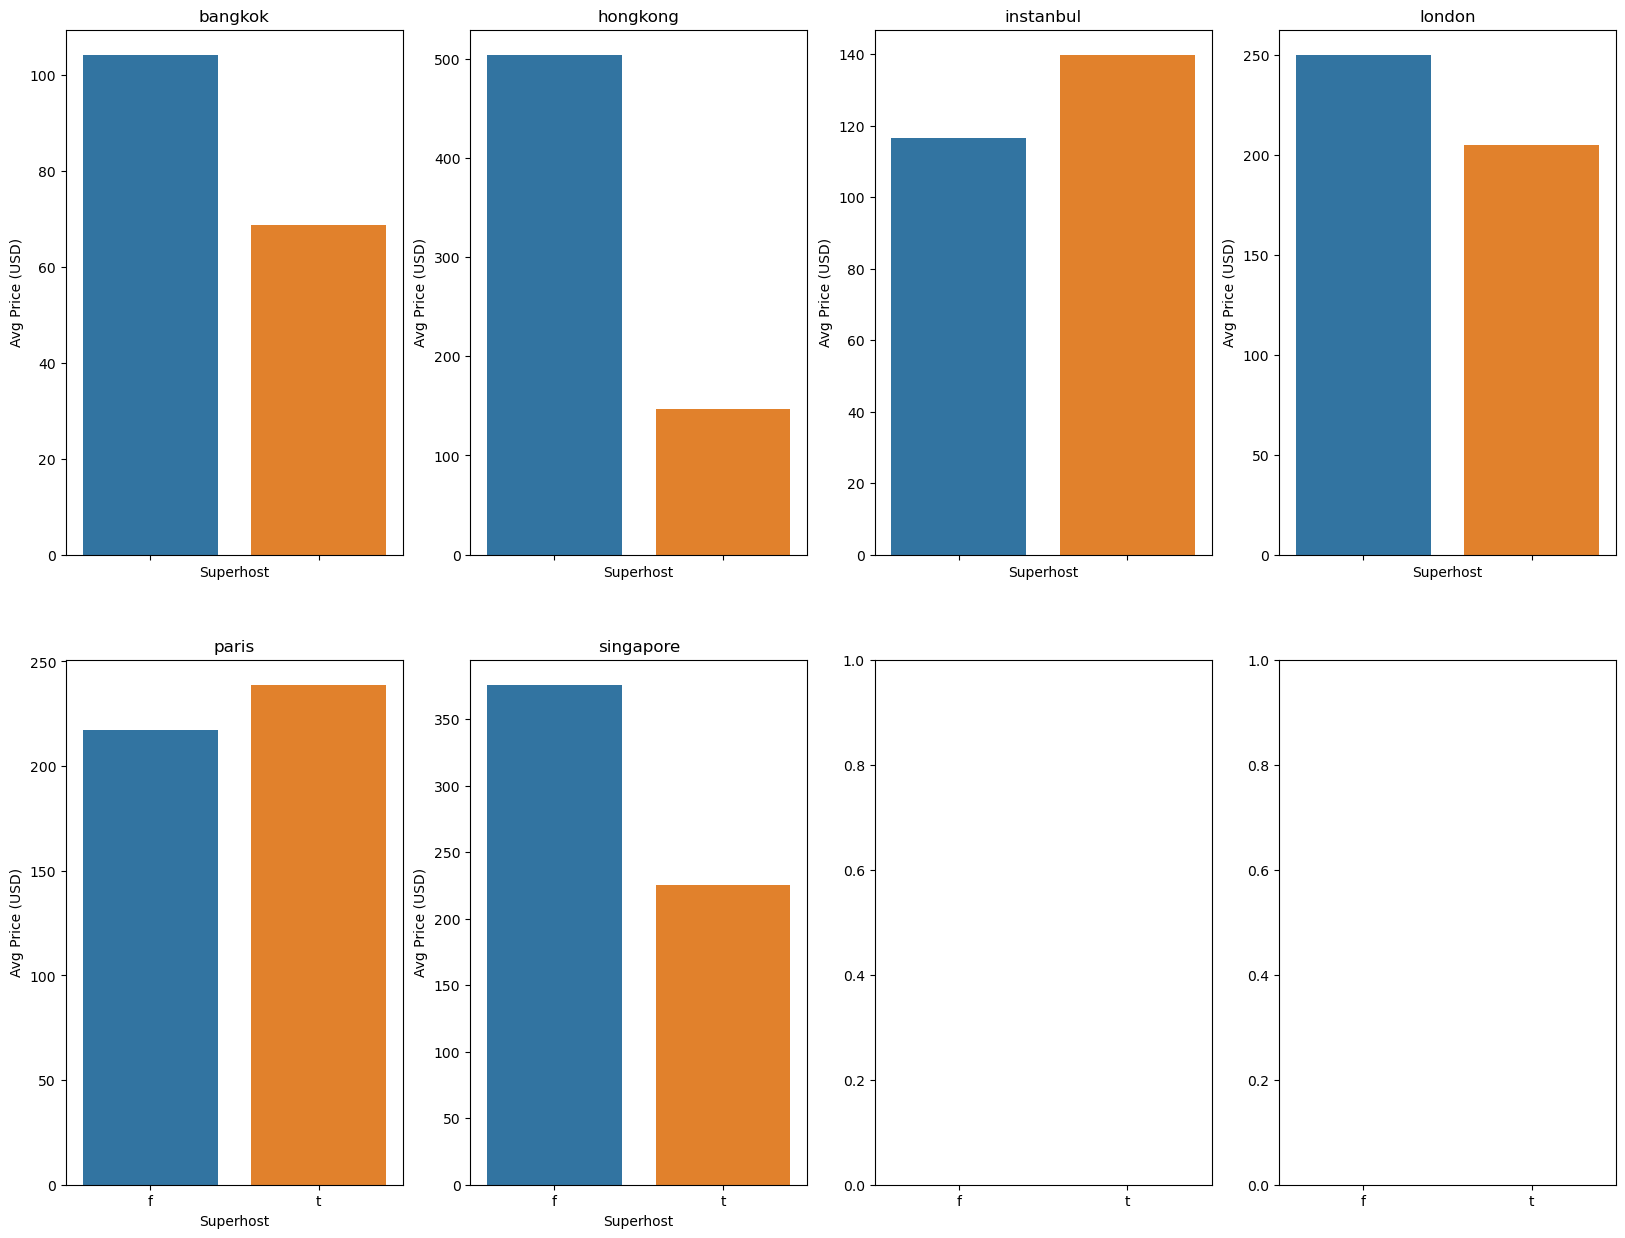

In [156]:
fig, axes = plt.subplots(2,4, sharex=True, sharey=False,figsize=(20, 15))

for thing,ax in zip(superhosts_city_cost_df['City'].unique(),axes.flat):
    sns.barplot(x=superhosts_city_cost_df[superhosts_city_cost_df['City'] == thing]['Superhost'],\
                y=superhosts_city_cost_df[superhosts_city_cost_df['City'] == thing]['Price(USD)'],\
                ax=ax).set(title=thing,ylabel='Avg Price (USD)',xlabel='Superhost')
    

In [158]:
#use mean
#reviews
superhosts_city_reivew = my_df.groupby(['City','Superhost']).agg({'Review_Scores_Value':'mean'})
superhosts_city_review_df = superhosts_city_reivew.reset_index()
superhosts_city_review_df



,City,Superhost,Review_Scores_Value
0,bangkok,f,4.599408
1,bangkok,t,4.782971
2,hongkong,f,4.464896
3,hongkong,t,4.652853
4,instanbul,f,4.533738
5,instanbul,t,4.779429
6,london,f,4.542983
7,london,t,4.777688
8,paris,f,4.558898
9,paris,t,4.757825


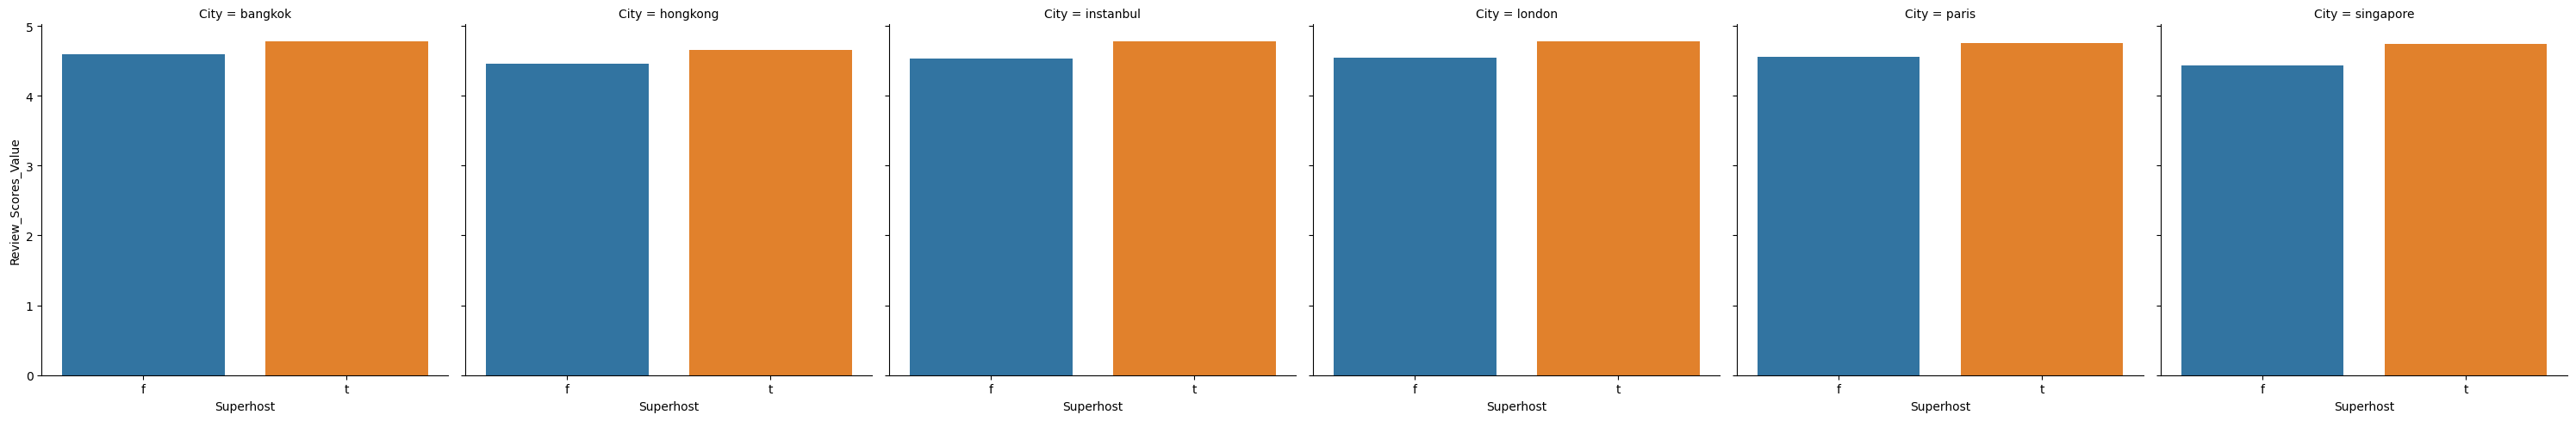

In [165]:
sns.catplot(x='Superhost',y='Review_Scores_Value',data=superhosts_city_review_df,kind='bar',col='City')

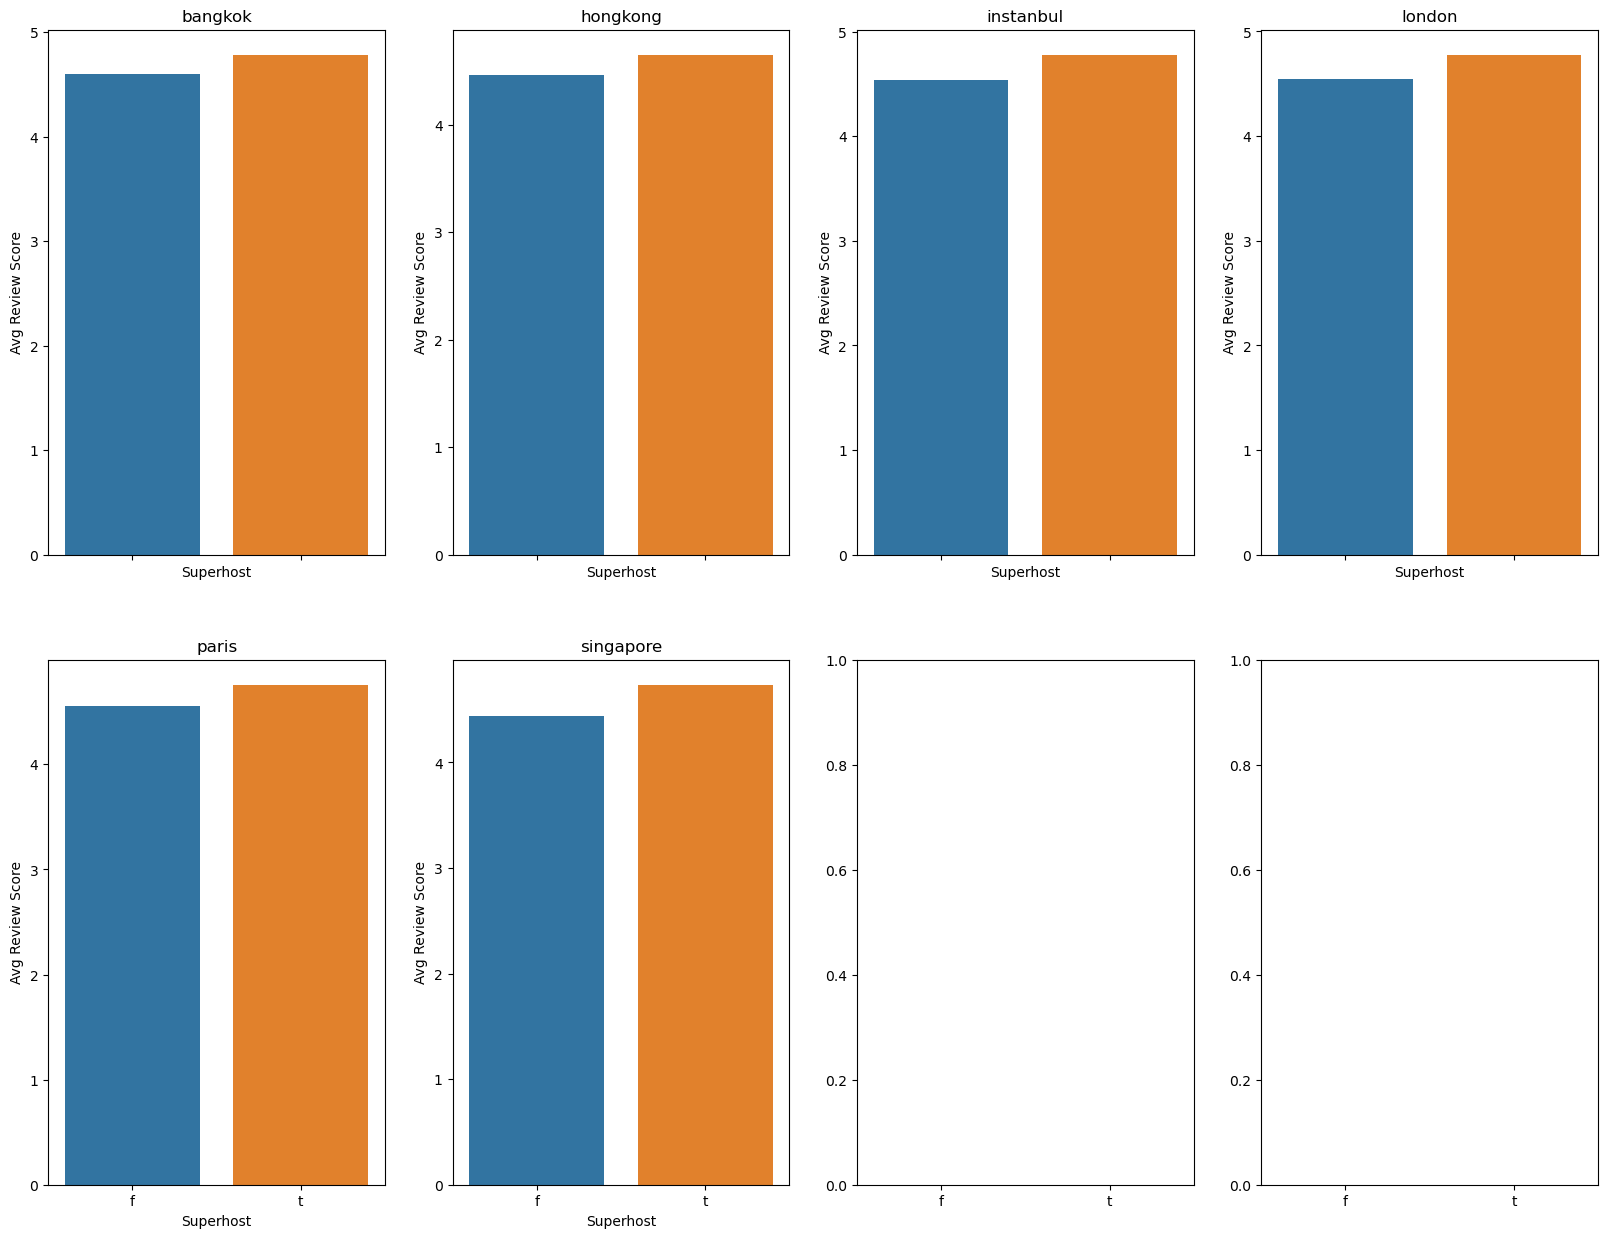

In [159]:
fig, axes = plt.subplots(2,4, sharex=True, sharey=False,figsize=(20, 15))

for thing,ax in zip(superhosts_city_review_df['City'].unique(),axes.flat):
    sns.barplot(x=superhosts_city_review_df[superhosts_city_review_df['City'] == thing]['Superhost'],\
                y=superhosts_city_review_df[superhosts_city_review_df['City'] == thing]['Review_Scores_Value'],\
                ax=ax).set(title=thing,ylabel='Avg Review Score',xlabel='Superhost')
    